In [1]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import torch

print("torch imported")

torch imported


In [4]:
torch.mul(torch.tensor([1, 2, 3]), torch.tensor([4, 5, 6]))

tensor([ 4, 10, 18])

Reshaping, stacking, sqeezing, and expanding(unsqeez) arrays
Permute- Return a view of the input with the dimensions permuted in the order specified by the user.                                

In [5]:
import torch
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [6]:
# Add extra dimension
x_reshaped = x.reshape(1, 9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [7]:
# Change the view
z = x.view(1, 9)

z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [8]:
#  Changes x changes z and vice versa bcz they share the same memory

z[:, 0] = 100
x, z

(tensor([100.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 tensor([[100.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]]))

In [9]:
# unsqeeze
x.unsqueeze(0), x.unsqueeze(0).shape

(tensor([[100.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]]),
 torch.Size([1, 9]))

In [10]:
# torch.empty_permuted

x = torch.randn(2, 3, 4)
x, x.shape

x_permuted = x.permute(2, 0, 1)
x_permuted, x_permuted.shape

(tensor([[[ 1.1792,  0.2388, -1.1402],
          [ 0.2752,  0.0391, -0.6773]],
 
         [[ 0.3935,  2.1981,  1.0089],
          [ 0.3772,  2.0973,  0.1433]],
 
         [[ 0.0588, -0.4512, -0.8702],
          [-0.8341,  0.1969, -0.7435]],
 
         [[-0.8027, -0.5252,  1.1586],
          [-0.0666, -0.1449, -0.0250]]]),
 torch.Size([4, 2, 3]))

In [11]:
x_orginal = torch.rand(size=(224, 224, 3)) # [height, width, channels]
x_orginal.shape

# Permute the orignal tensor to rearrange the dimensions
x_permuted = x_orginal.permute(2, 0, 1) # [channels, height, width] shift axix 0 -> 1, 1 -> 2, 2 -> 0
x_permuted.shape

torch.Size([3, 224, 224])

In [12]:
x_orginal[0, 0, 0]

tensor(0.2229)

## Indexing (selecting data from tensor)

Indexing in Pytorch is same as numpy

In [13]:
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [14]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [15]:
# Lets index on middle bracket

x[0][0]

tensor([1, 2, 3])

In [16]:
#Lets index on the inner bracket (last dimension)

# always mind the  zeroth index

x[0][0][0]

tensor(1)

In [17]:
# you can also use ':' to slelct "all" elements in a dimension
x[0, :, 0] # all elements in the second dimension and zeroth index in the last dimension

tensor([1, 4, 7])

In [18]:
x[:, :, 1]

tensor([[2, 5, 8]])

In [19]:
# Get all values of 0 dimension but only the 1 index balue of the 1st and 2nd dimension
x[:, 1, 1] # all elements in the zeroth dimension and 1 index in the 1st and 2nd dimension

tensor([5])

In [20]:
# Get index of 0 and 0th 1st dximension and all values of the 2nd dimension
x[0, 0, :] # 0 index in the zeroth and 1st dimension and all values of the 2nd dimension

tensor([1, 2, 3])

# Pytorch tensors and numpy

NumPy is a popular scientific Python numerical computing library.
And because of this, PyTorch has functionality to interact with it.
* Data in NumPy, want in PyTorch tensor from numpy( ndarray)
* pyTorch tensor -> Numpy array

# Pytorch reproducbility
` start with random numbers -> tensor operations -> update random numbers to try and make them better -> repeat -> again ->.....`

### Simply use `random.seed()`

### Running tensors and Pytorch operation on GPU


In [21]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [22]:
# CHeck for GOU acess with the Pytorch

import torch
torch.cuda.is_available()



False

In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [24]:
torch.cuda.device_count()

0

In [25]:
#create a tensor (Default on the cpu)
tensor = torch.tensor([1, 2,3])
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [26]:
tensor_on_gpu = tensor.to(device)
tensor_on_gpu, tensor_on_gpu.device

(tensor([1, 2, 3]), device(type='cpu'))

In [27]:
# Tendor on GPU can't be converted to Numpy

tensor_on_gpu.numpy()

array([1, 2, 3])

#  ______________________________________________Pytorch Workflow______________________________________________

In [28]:
# Pytorch workflow

# Lets explore the Pytorcvh and end-to-end workflow

In [29]:
what_we_are_covering = {1: "data (prepeare and load)", 
                        2: "model (build, train, test)", 
                        3: "loss function", 
                        4: "optimizer", 
                        5: "training loop", 
                        6: "testing loop"}
for key, value in what_we_are_covering.items():
    print(f"{key}: {value}")  

1: data (prepeare and load)
2: model (build, train, test)
3: loss function
4: optimizer
5: training loop
6: testing loop


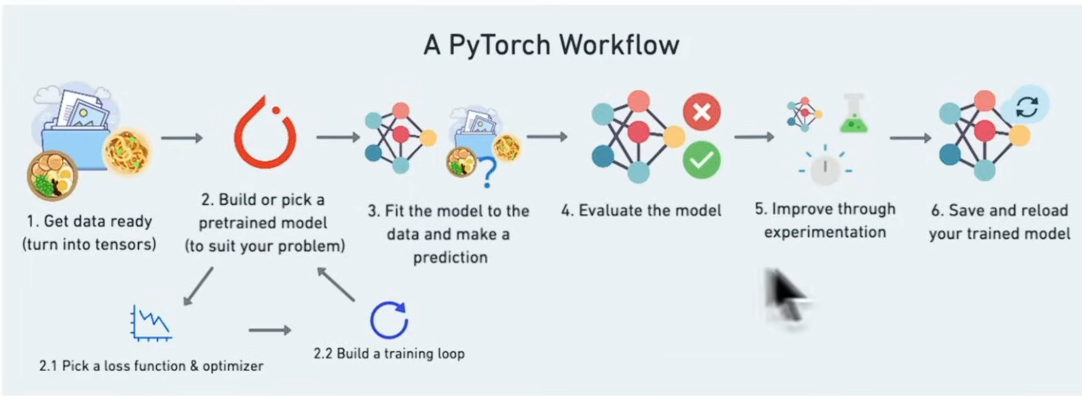

In [30]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import torch
from torch import nn

# input > hidden layers x n > output

import matplotlib.pyplot as plt

torch.__version__

'2.7.0+cpu'

### Data Preparing and loading

In [32]:
# Convert data to numeric values

## Data can be anything , Sheet, image, video, audio, DNA, Text

## Machine learning is the dgame of two parts > get data in a muberical (manas ka number data = mumberical) representation > Buuld a model to learn pattern

## find patterns in data

# To showcase this, lets create some data usnig linear regression formula

# We will use a LR formula to make st. line woth known parameters.

# Create *Known* parameters

weight = 0.7
bais = 0.3

# creat some data

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
#unsqueeze adds extra dimension
y = weight * X + bais

X[: 10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [33]:
### Splitting data in test and train
len(X), len(y)


(50, 50)

In [34]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [35]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """ Plot training data, test data and compares predictions. """

    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing dataset")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

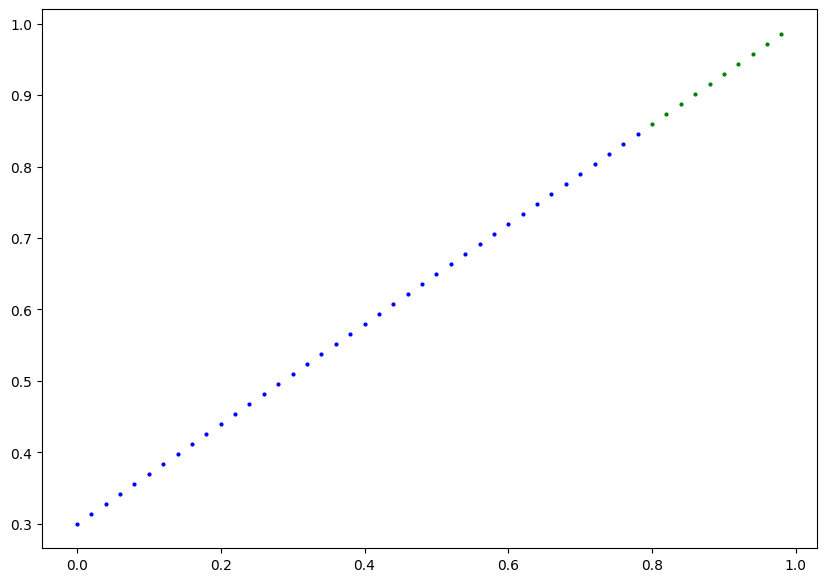

In [36]:
plot_predictions()

In [37]:
# Linear Regression --> Predictive modeling
# SGD --> Optimisation modeling

## Build a model

What are model does:
Start with random values (weight & bais)
Look at the training data so it can adjust the random values to better represent the ideal

1. Gradient descent
2. Backpropagation

In [38]:
# Creat a linear regerssion model class

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
        requires_grad=True, dtype=torch.float))


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [39]:
model = LinearRegressionModel()
model

LinearRegressionModel()

In [40]:
# Pytorch model building essentials

# torch.nn -> contains all of buileding blocks for computaional graph (a  nn can be considered as computational graph)
# TORCH.NN.pARAMETERS
# torch.nn.Modules
# torch.nn.optim - this is where optimizers in Pytorch lives

# def forward() - All nn.Moduls subclasses refquires to override this method

 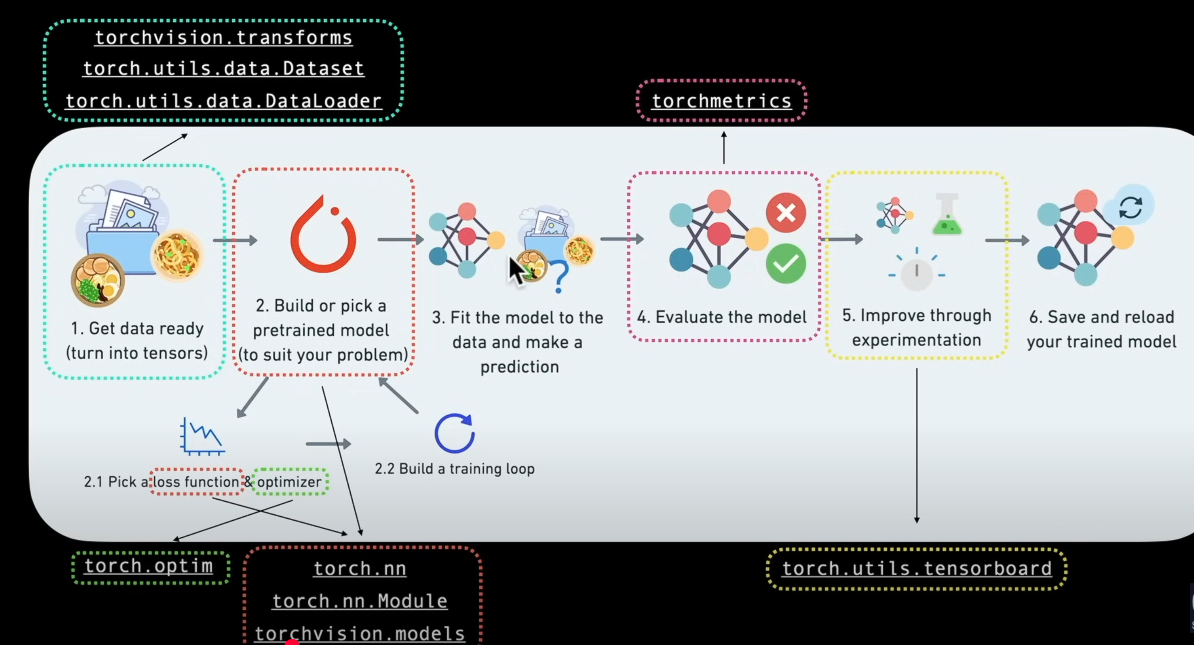

In [41]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [42]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [43]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [44]:
### Making prediction using `torch.inference_model()`

with torch.inference_mode():  # CONTEXT MANAGER
    y_preds = model_0(X_test)

#same thing we can do using NO_GRAD()  but inference_model is prefered
# with torch.no_grad():





In [45]:
y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

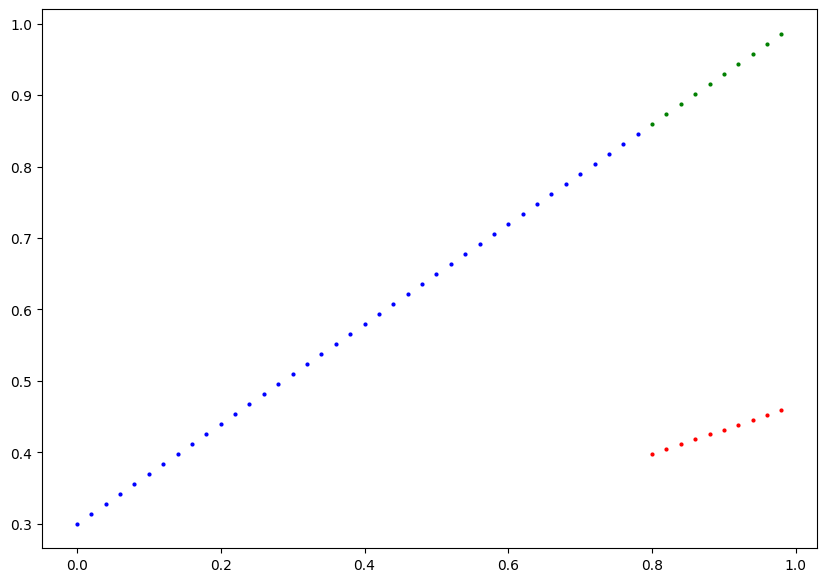

In [46]:
plot_predictions(predictions=y_preds)

# Train Model 

The idea is to move the model from *unknown* parameters to some known parameters that is from a poor representation to a better representation

use *loss function* to measure how wrong r the models predections

Things we need to train:

* *Loss Function*
* *Optimizer* : It takes into account the loss of the models and adjusts the models parameters(weights & bias) to improve the loss function (e.g --> SGD)

For pytorch we need:
* A training loop
* A testing loop


In [47]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [50]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

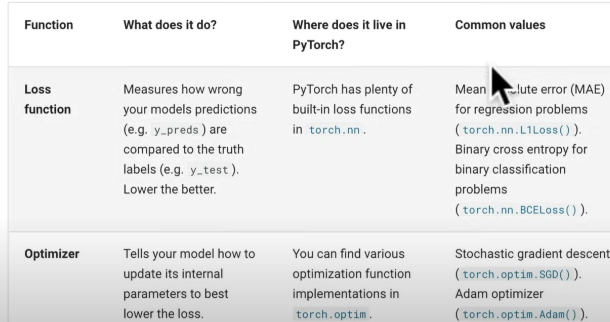

In [53]:
# Set up a loss function
loss_fn = nn.L1Loss()  #L1 is MAE and L2 is MSE

# Set up the optimizer (SGD)
optimizer = torch.optim.SGD(model_0.parameters(),
                           lr=0.01) #changes in parameters depend on learning rate 







### Building a training and testing loop

**Training loop**
* loop through the data
*Forward Pass/ Forward Propogation : Involves moving through the data through the model's `forward()` functions() to make predictions on the data
*Calculate the loss
* Optimizer zero grad
* Loss Backward- BACK PROPOGATION
* Optimizer Step

> 


In [54]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [80]:
#OPOCH > one loop through data
epochs = 5
#step 1 TRAINING
for epoch in range(epochs):
    #set the model to training mode
    model_0.train()  #sets all parameters that require gradients to require gradient

    #Forward pass
    y_pred = model_0(X_train)
    #calc loss
    loss = loss_fn(y_pred,y_train)
    #optimizer 0grad (zero the gradients of the optimizer)
    optimizer.zero_grad()
    #performs backpropogation on the loss with respect to the parameters of the model
    loss.backward()
    #optimizer(performs gradient descent)
    optimizer.step()
    print(epoch, "loss", loss)

    #TESTING
    model_0.eval() #turns off gradient tracking
    
    print(model_0.state_dict())
    
    

0 loss tensor(0.0089, grad_fn=<MeanBackward0>)
OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})
1 loss tensor(0.0026, grad_fn=<MeanBackward0>)
OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})
2 loss tensor(0.0089, grad_fn=<MeanBackward0>)
OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})
3 loss tensor(0.0026, grad_fn=<MeanBackward0>)
OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})
4 loss tensor(0.0089, grad_fn=<MeanBackward0>)
OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})


In [72]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [73]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [77]:
weight, bais

(0.7, 0.3)

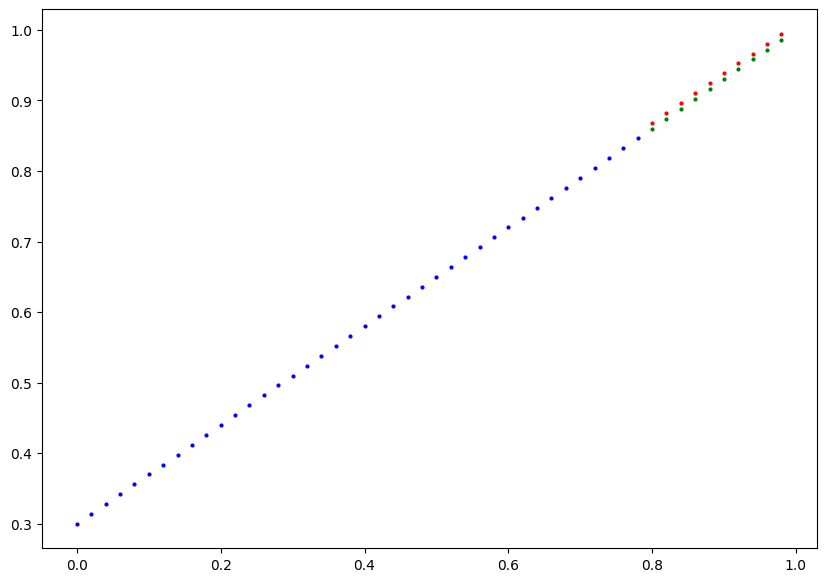

In [79]:
plot_predictions(predictions=y_preds_new);